Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import gaussian_kde
from scipy.stats import ttest_ind

Reading in the dataset, cleaning the dataset and doing preliminary visual analysis

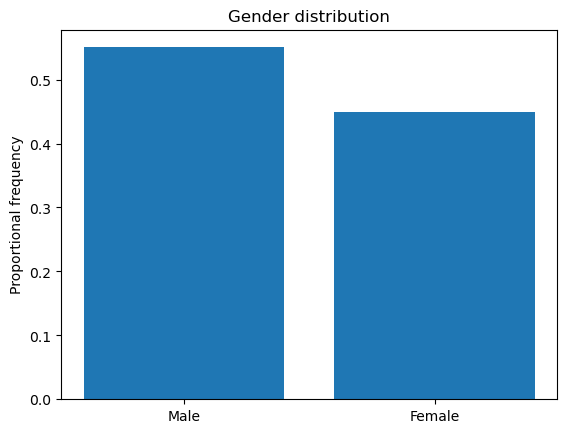

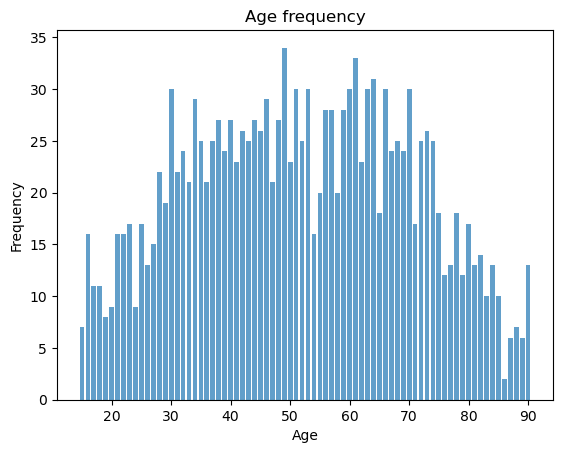

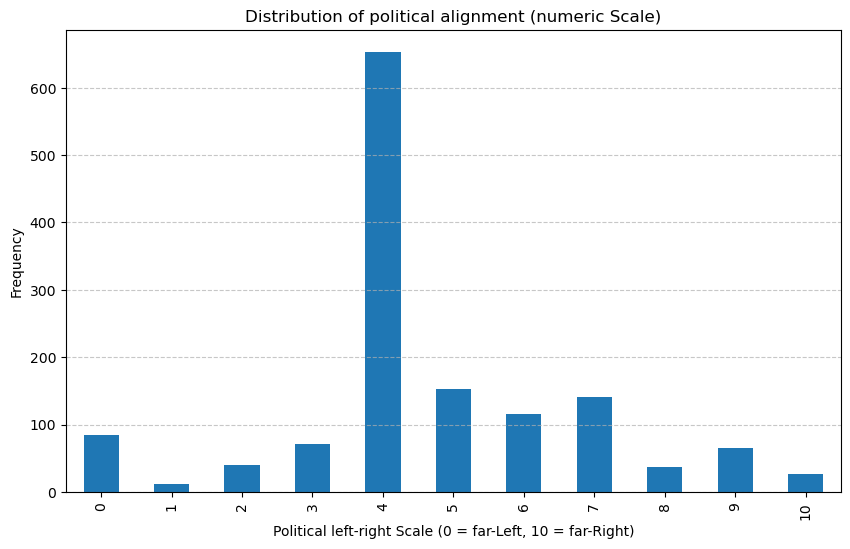

   lrscale lrscale_category
1        4           center
3        1         far-left
4        9        far-right
5        3             left
6        5           center


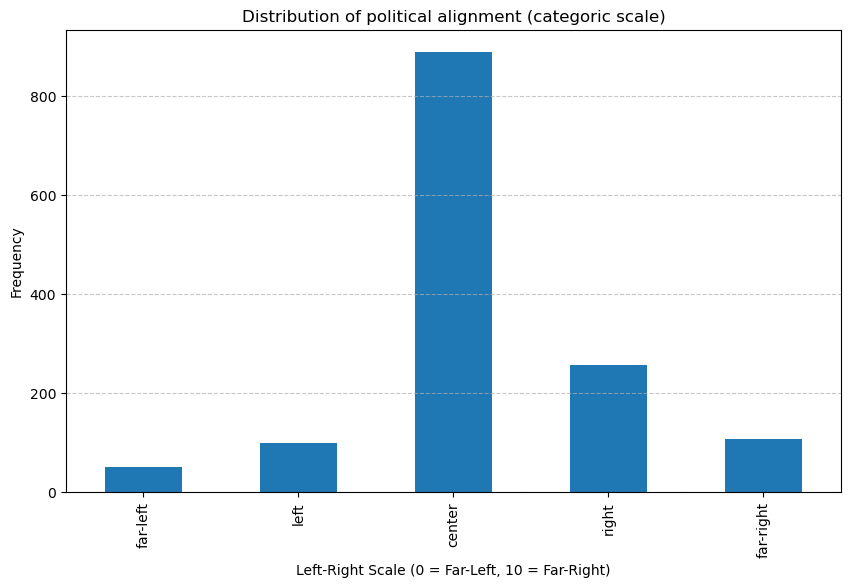

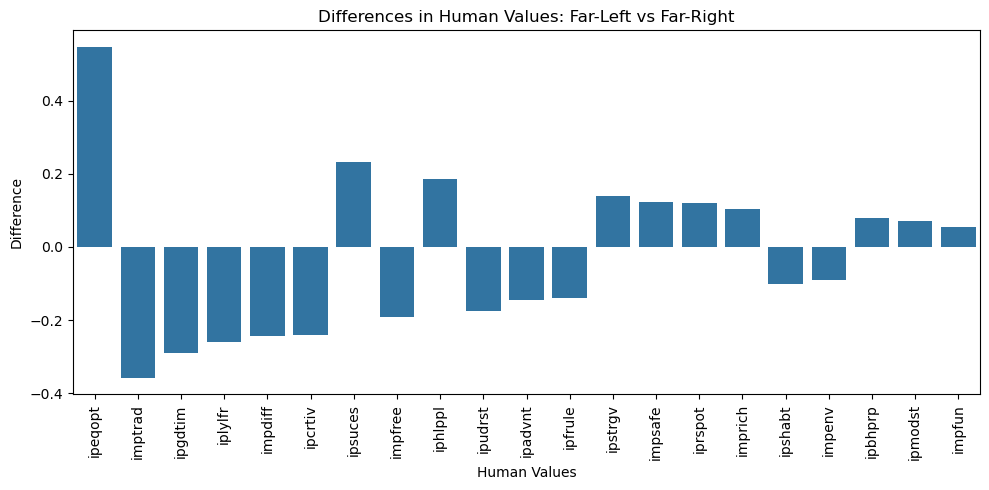

In [4]:
data = pd.read_csv('project_dataset.csv')

#gender distribution
labels = ['Male', 'Female']
plt.bar(labels, data['gndr'].value_counts() / data['gndr'].value_counts().sum())
plt.ylabel('Proportional frequency')
plt.title('Gender distribution')
plt.show()

#age distribution
age_counts = data['agea'].value_counts().sort_index()

plt.bar(age_counts.index, age_counts.values, alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age frequency')
plt.show()

#political alignment distribution
values = [
    'ipcrtiv', 'imprich', 'ipeqopt', 'ipshabt', 'impsafe', 'impdiff',
    'ipfrule', 'ipudrst', 'ipmodst', 'ipgdtim', 'impfree', 'iphlppl',
    'ipsuces', 'ipstrgv', 'ipadvnt', 'ipbhprp', 'iprspot', 'iplylfr',
    'impenv', 'imptrad', 'impfun'
]

for var in values:
    data = data[(data[var] >= 1) & (data[var] <= 6)] #all values
data = data[(data['lrscale'] >= 0) & (data['lrscale'] <= 10)] #left-right

#numeric distribution (left-right)
plt.figure(figsize=(10, 6))
data['lrscale'].value_counts(sort=False).plot(kind='bar')
plt.title('Distribution of political alignment (numeric Scale)')
plt.xlabel('Political left-right Scale (0 = far-Left, 10 = far-Right)')
plt.ylabel('Frequency')
plt.xticks(range(11), labels=range(11))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#categoric distribution
bins = [0, 1, 3, 6, 8, 10]
labels = ['far-left', 'left', 'center', 'right', 'far-right']
data['lrscale_category'] = pd.cut(data['lrscale'], bins=bins, labels=labels, include_lowest=True)

print(data[['lrscale', 'lrscale_category']].head())

plt.figure(figsize=(10, 6))
data['lrscale_category'].value_counts(sort=False).plot(kind='bar')
plt.title('Distribution of political alignment (categoric scale)')
plt.xlabel('Left-Right Scale (0 = Far-Left, 10 = Far-Right)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
#plt.savefig('poster1.pdf', format='pdf')
plt.show()

#values (differences)
values_columns = [
    'ipcrtiv', 'imprich', 'ipeqopt', 'ipshabt', 'impsafe', 'impdiff',
    'ipfrule', 'ipudrst', 'ipmodst', 'ipgdtim', 'impfree', 'iphlppl',
    'ipsuces', 'ipstrgv', 'ipadvnt', 'ipbhprp', 'iprspot', 'iplylfr',
    'impenv', 'imptrad', 'impfun'
]

threshold_low = data['lrscale'].quantile(0.2)
threshold_high = data['lrscale'].quantile(0.8)
far_left = data[data['lrscale'] <= threshold_low]
far_right = data[data['lrscale'] >= threshold_high]

differences = {
    col: far_right[col].mean() - far_left[col].mean() for col in values_columns
}
sorted_diff = dict(sorted(differences.items(), key=lambda x: abs(x[1]), reverse=True))



far_left = data[data['lrscale_category'] == 'far-left']
far_right = data[data['lrscale_category'] == 'far-right']

differences = {
    col: far_right[col].mean() - far_left[col].mean() for col in values
}

sorted_diff = dict(sorted(differences.items(), key=lambda x: abs(x[1]), reverse=True))

plt.figure(figsize=(10, 5))
sns.barplot(x=list(sorted_diff.keys()), y=list(sorted_diff.values()))
plt.title("Differences in Human Values: Far-Left vs Far-Right")
plt.xlabel("Human Values")
plt.ylabel("Difference")
plt.xticks(rotation=90)
plt.tight_layout()
#plt.savefig('poster2.pdf', format='pdf')
plt.show()

# Taking a deeper look at the data

There are slightly more males than females in the sample, good age distribution. As the data is from a reputable data source (ESS), this was expected. We deemed it unnecessary to do any balancing to the dataset, as the gender discrepancy was not extreme.

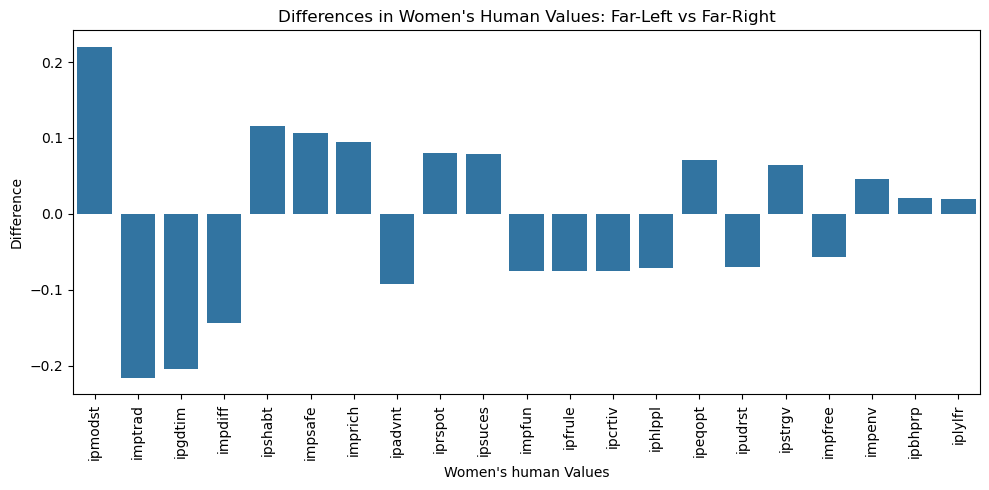

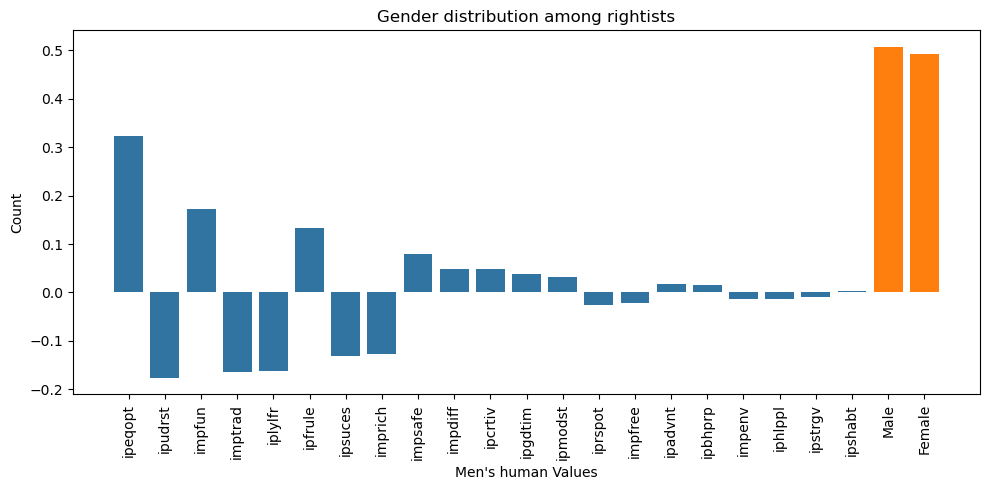

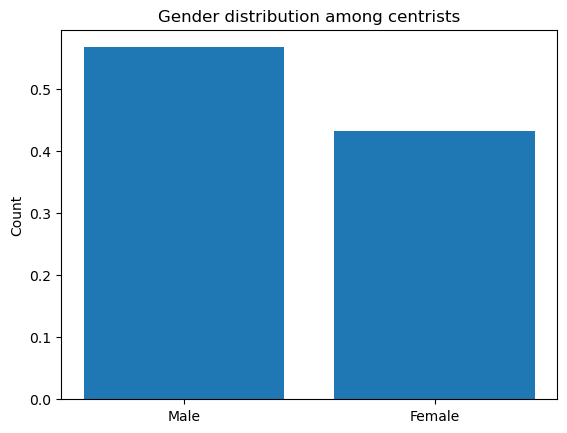

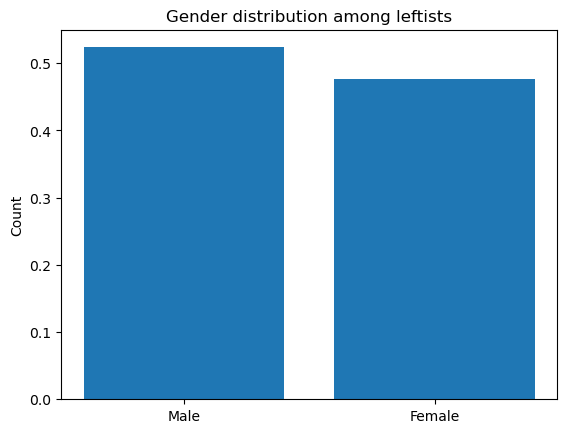

In [7]:
# as the differences in responses in far-right and far-left was interesting, we also decided to look into how
# far-left and far-right participants' views differ on the basis of gender and how their priorities align
women = pd.DataFrame(data[(data['gndr'] == 2)])
women_far_left = women[women['lrscale'] <= threshold_low]
women_far_right = women[women['lrscale'] >= threshold_high]
womendifferences = {
    col: women_far_right[col].mean() - women_far_left[col].mean() for col in values_columns
}
sorted_diff = dict(sorted(womendifferences.items(), key=lambda x: abs(x[1]), reverse=True))
plt.figure(figsize=(10, 5))
sns.barplot(x=list(sorted_diff.keys()), y=list(sorted_diff.values()))
plt.title("Differences in Women's Human Values: Far-Left vs Far-Right")
plt.xlabel("Women's human Values")
plt.ylabel("Difference")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show

men = pd.DataFrame(data[(data['gndr'] == 1)])
men_far_left = men[men['lrscale'] <= threshold_low]
men_far_right = men[men['lrscale'] >= threshold_high]
mendifferences = {
    col: men_far_right[col].mean() - men_far_left[col].mean() for col in values_columns
}
sorted_diff = dict(sorted(mendifferences.items(), key=lambda x: abs(x[1]), reverse=True))
plt.figure(figsize=(10, 5))
sns.barplot(x=list(sorted_diff.keys()), y=list(sorted_diff.values()))
plt.title("Differences in Men's Human Values: Far-Left vs Far-Right")
plt.xlabel("Men's human Values")
plt.ylabel("Difference")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show

# separating our data into three political groups - left-leaning, right-leaning and centrist participants
leftists = data[(data['lrscale_category'] == 'left') | (data['lrscale_category'] == 'far-left')]
centrists = data[data['lrscale_category'] == 'center']
rightists = data[(data['lrscale_category'] == 'right') | (data['lrscale_category'] == 'far-right')]

# taking a look at gender proportions among our three groups of political leanings
labels = ['Male', 'Female']
plt.bar(labels, rightists['gndr'].value_counts() / rightists['gndr'].value_counts().sum()) #among rightists,
plt.ylabel('Count')
plt.title('Gender distribution among rightists')
plt.show()

labels = ['Male', 'Female']
plt.bar(labels, centrists['gndr'].value_counts() / centrists['gndr'].value_counts().sum()) # centrists,
plt.ylabel('Count')
plt.title('Gender distribution among centrists')
plt.show()

labels = ['Male', 'Female']
plt.bar(labels, leftists['gndr'].value_counts() / leftists['gndr'].value_counts().sum()) # and leftists.
plt.ylabel('Count')
plt.title('Gender distribution among leftists')
plt.show()

Surprisingly enough, the proportions are most balanced for right-leaning participants. The biggest difference was for participants that self-identified as centrist, some of the proportional differences may simply be caused by the larger proportion of one gender, so could be something to analyse on a deeper level.

Visual analysis of whether human value question answers differ depending on overall leaning (left-center-right), not only of participants with more radical leanings (far-left, far-right).

<function matplotlib.pyplot.show(close=None, block=None)>

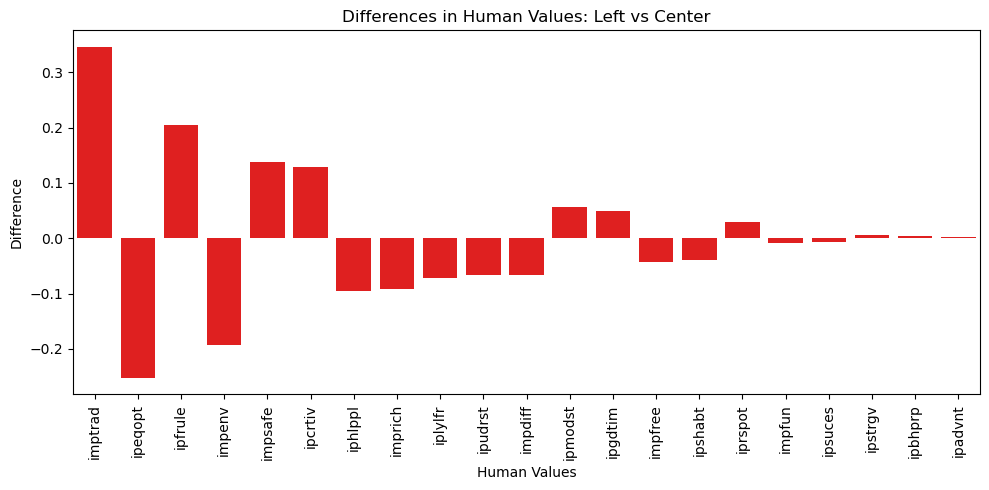

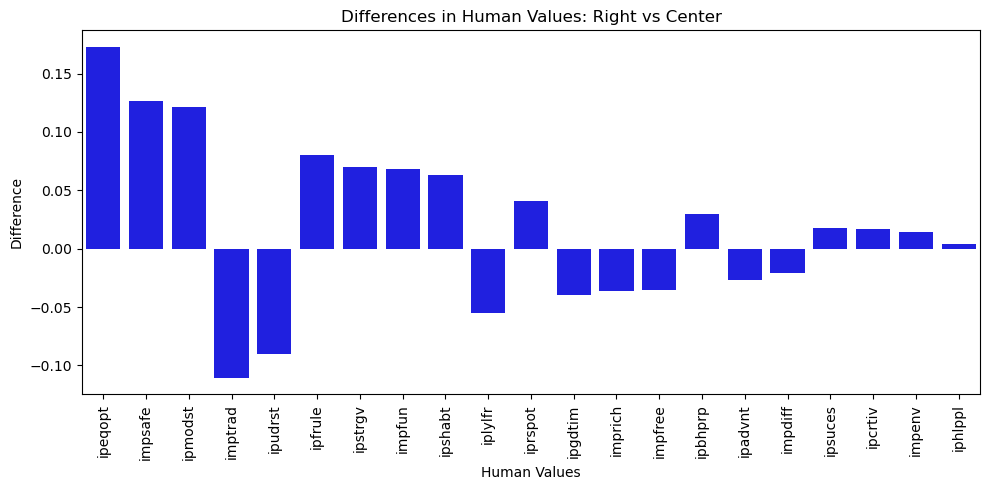

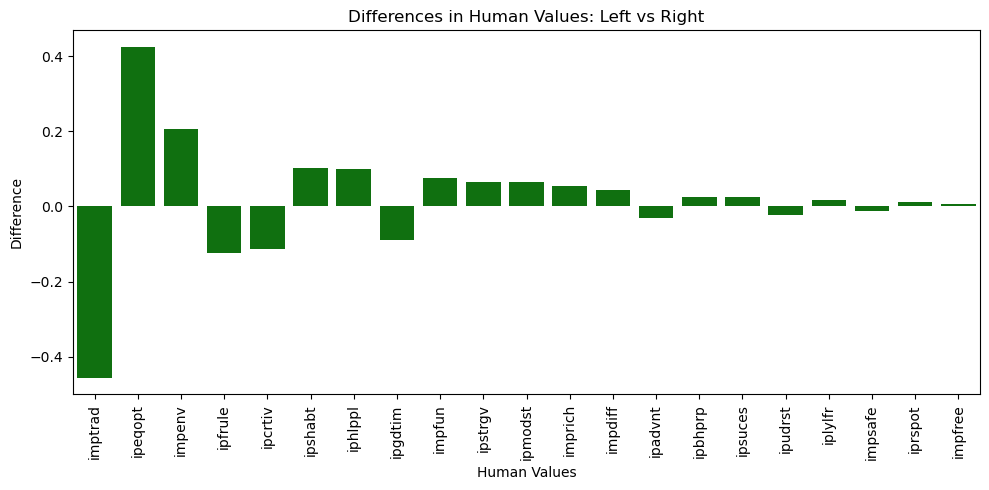

In [10]:
differences = {
    col: leftists[col].mean() - centrists[col].mean() for col in values_columns
}
sorted_diff = dict(sorted(differences.items(), key=lambda x: abs(x[1]), reverse=True))
sorted_diff
plt.figure(figsize=(10, 5))
sns.barplot(x=list(sorted_diff.keys()), y=list(sorted_diff.values()), color='red')
plt.title("Differences in Human Values: Left vs Center")
plt.xlabel("Human Values")
plt.ylabel("Difference")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show

differences = {
    col: rightists[col].mean() - centrists[col].mean() for col in values_columns
}
sorted_diff = dict(sorted(differences.items(), key=lambda x: abs(x[1]), reverse=True))
sorted_diff
plt.figure(figsize=(10, 5))
sns.barplot(x=list(sorted_diff.keys()), y=list(sorted_diff.values()), color='blue')
plt.title("Differences in Human Values: Right vs Center")
plt.xlabel("Human Values")
plt.ylabel("Difference")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show

differences = {
    col: rightists[col].mean() - leftists[col].mean() for col in values_columns
}
sorted_diff = dict(sorted(differences.items(), key=lambda x: abs(x[1]), reverse=True))
sorted_diff
plt.figure(figsize=(10, 5))
sns.barplot(x=list(sorted_diff.keys()), y=list(sorted_diff.values()), color='green')
plt.title("Differences in Human Values: Left vs Right")
plt.xlabel("Human Values")
plt.ylabel("Difference")
plt.xticks(rotation=90)
plt.tight_layout()
#plt.savefig('poster3.pdf', format='pdf')
plt.show

# Analysis of the visual and statistical correlation between political leaning and each human value

/var/folders/9_/cq1cfm697t5966116cm1w44c0000gn/T/ipykernel_6397/983659656.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means.append(data.groupby('lrscale_category')[value].mean())


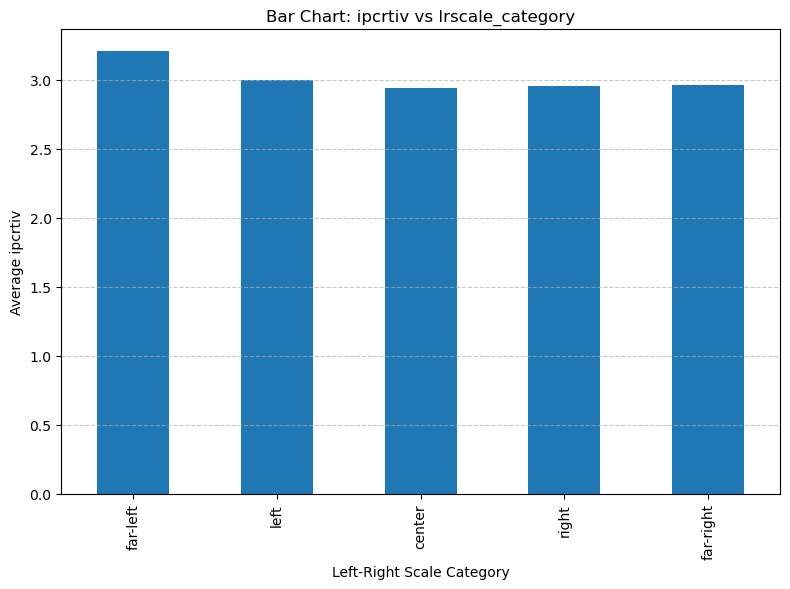

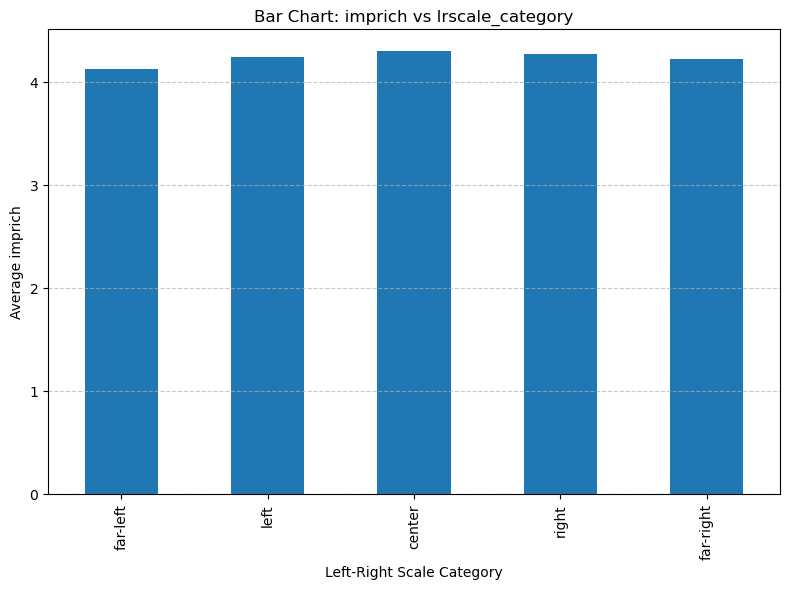

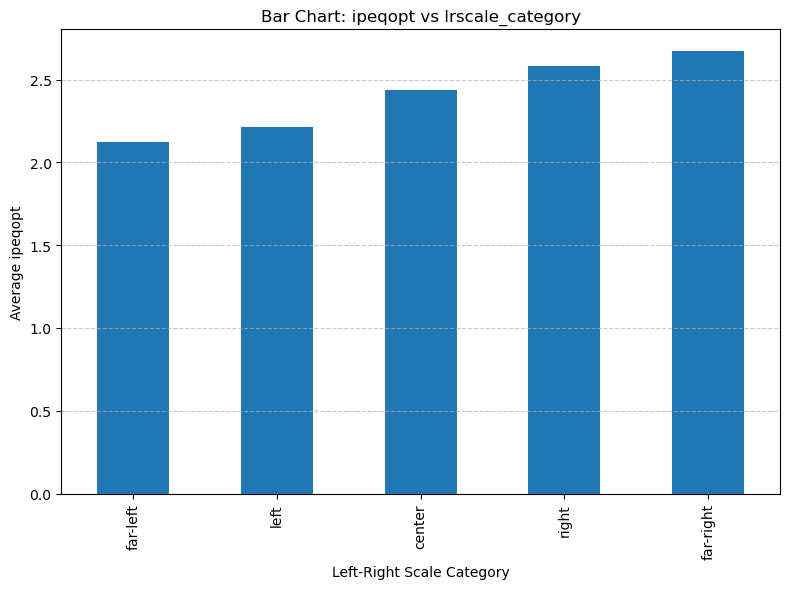

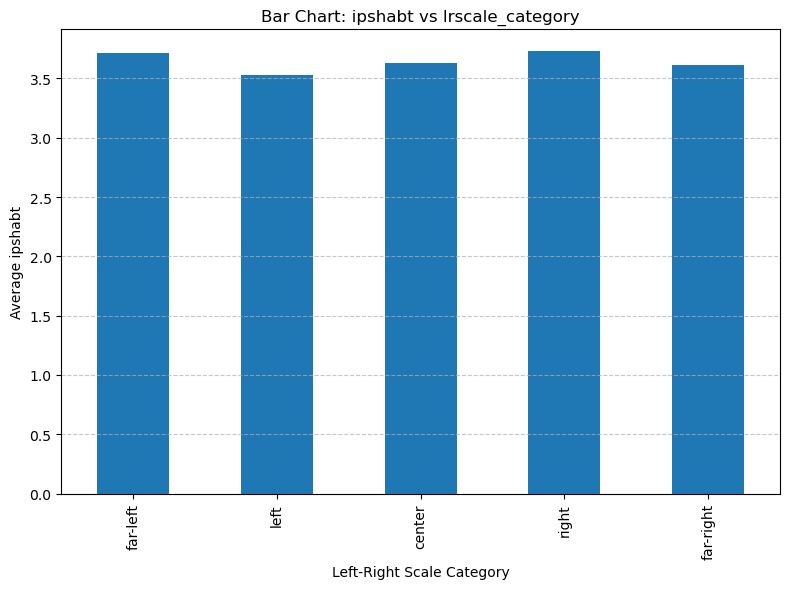

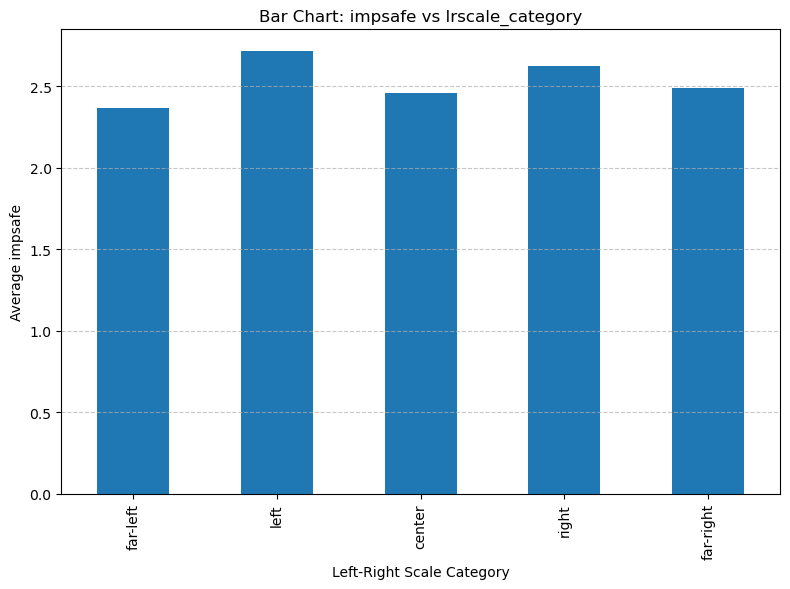

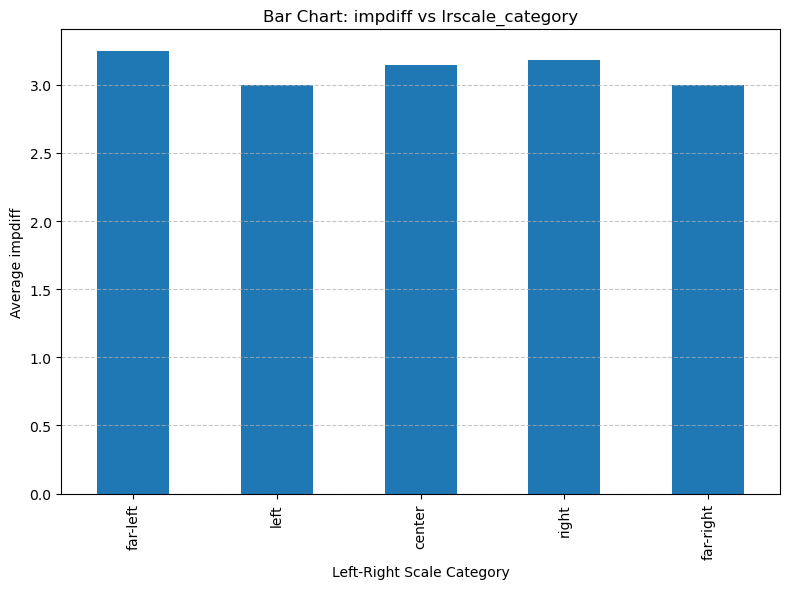

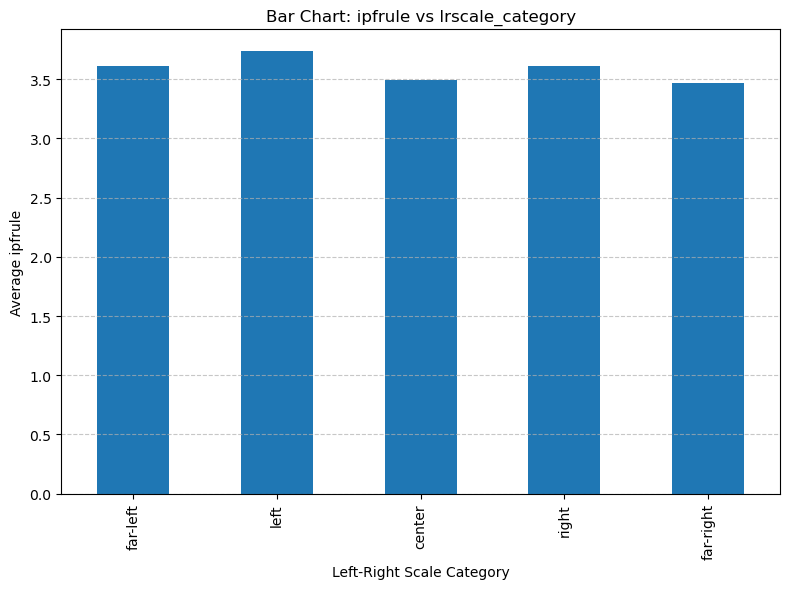

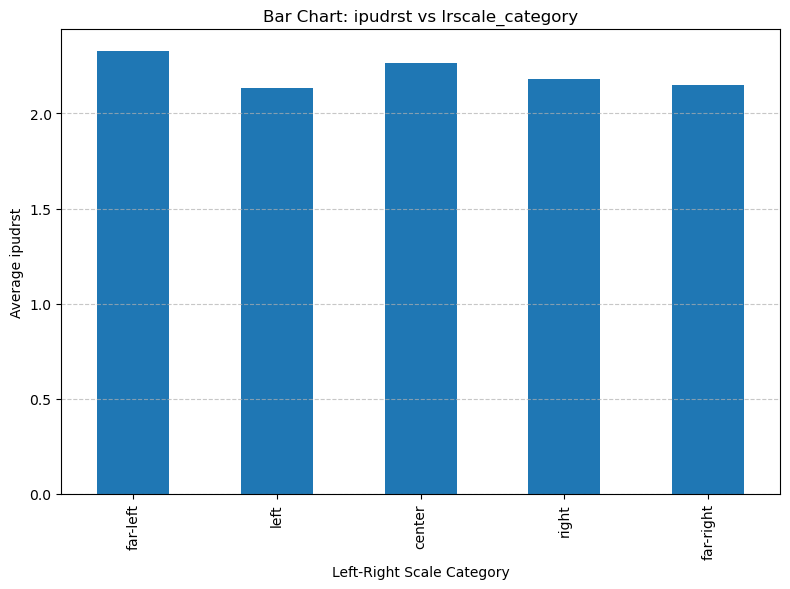

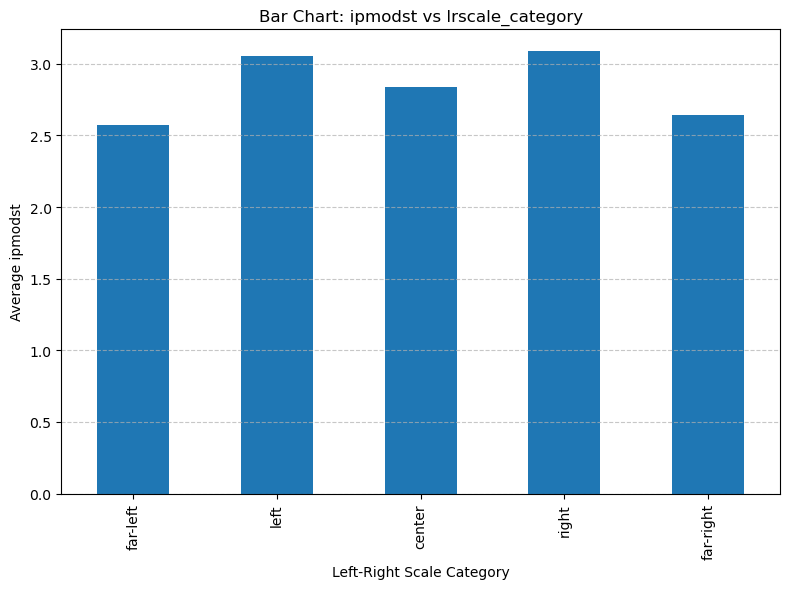

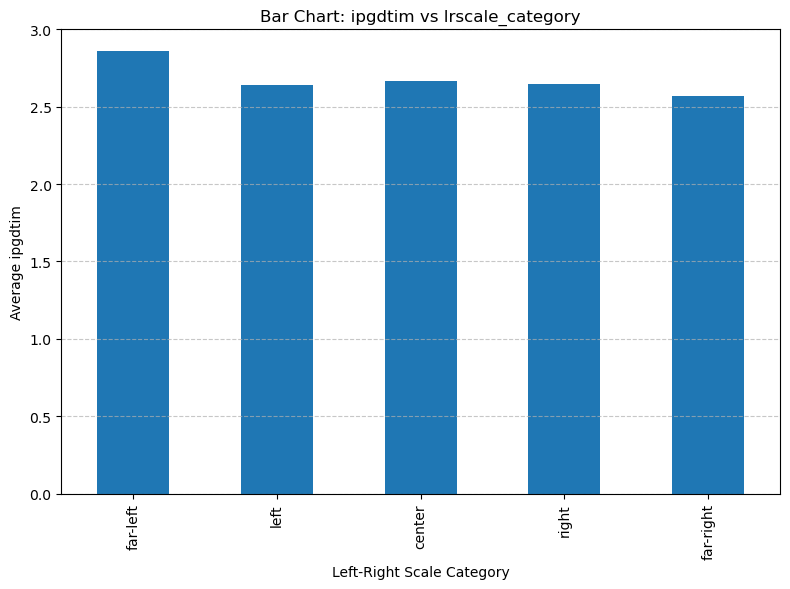

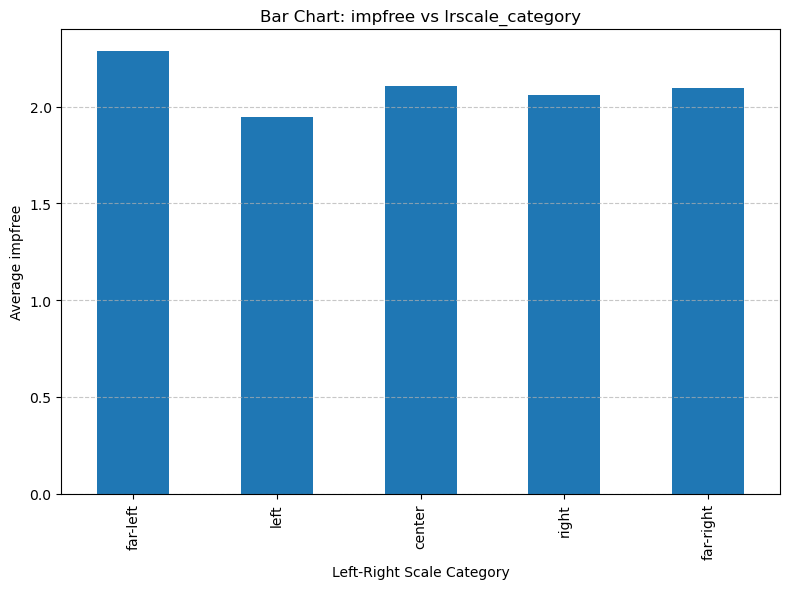

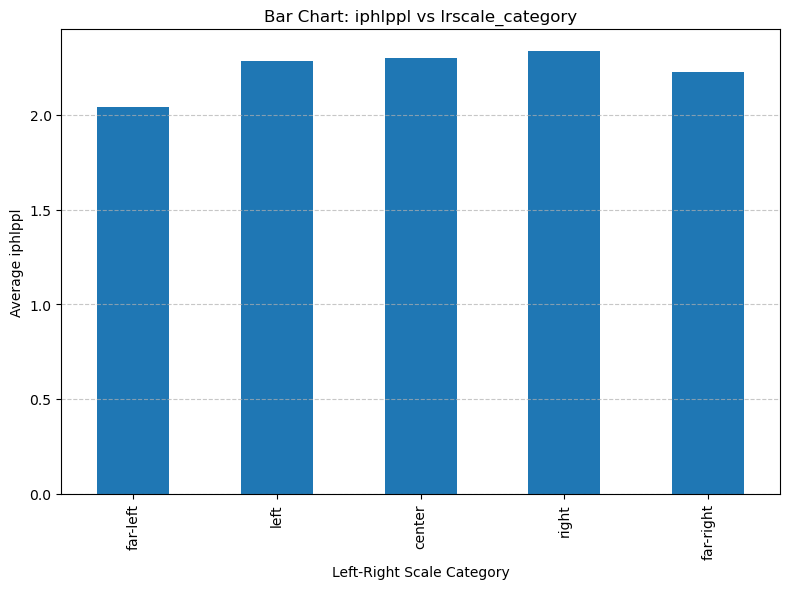

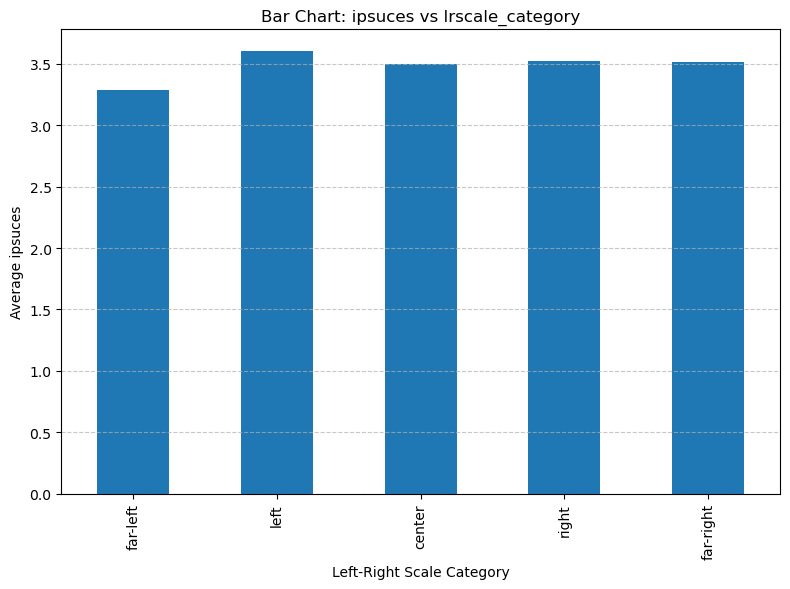

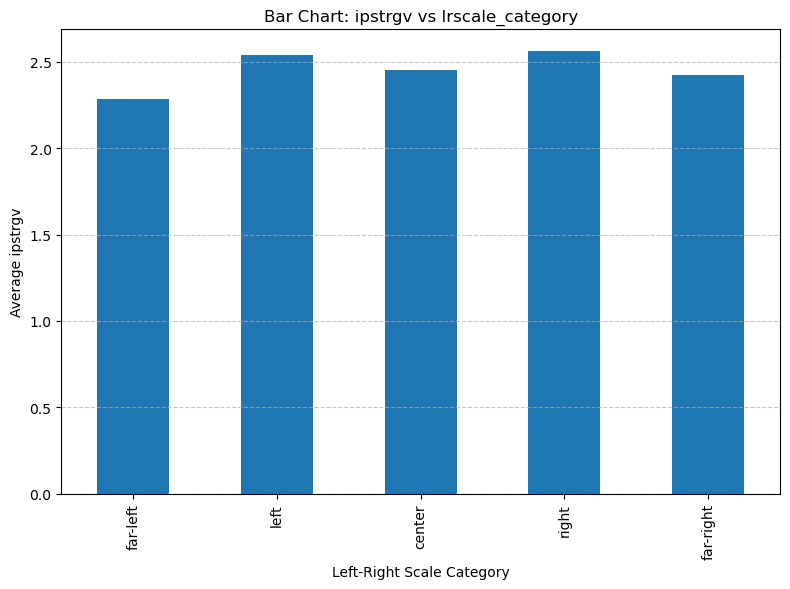

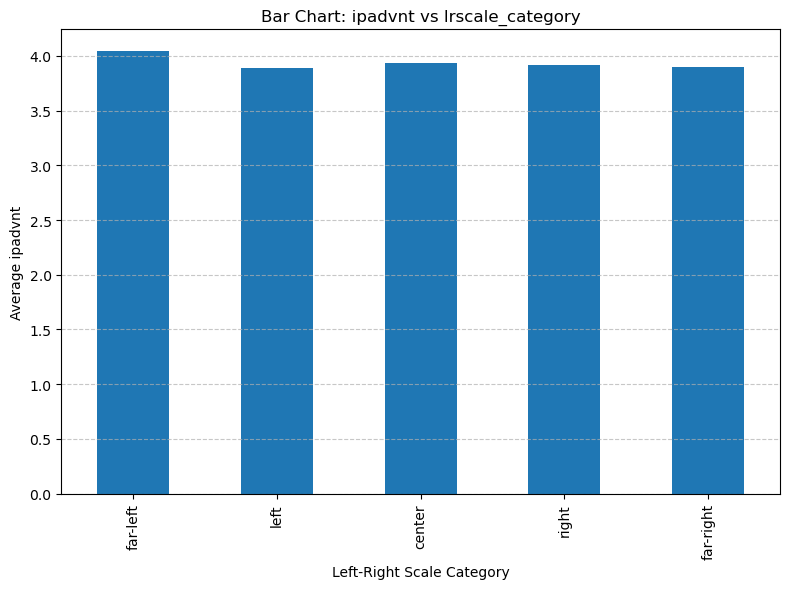

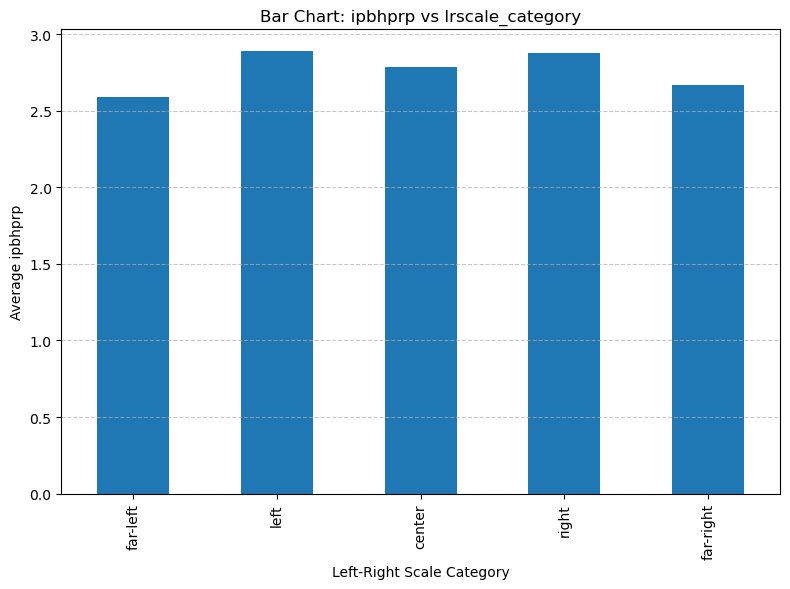

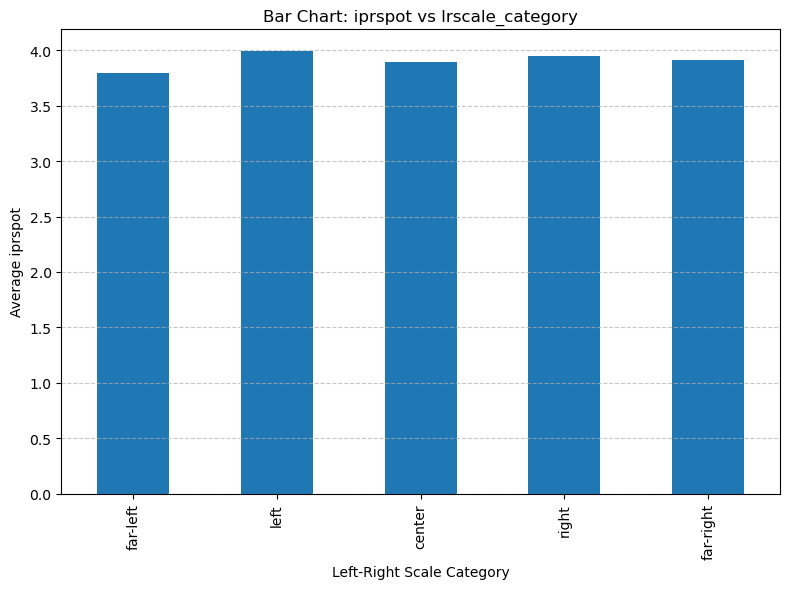

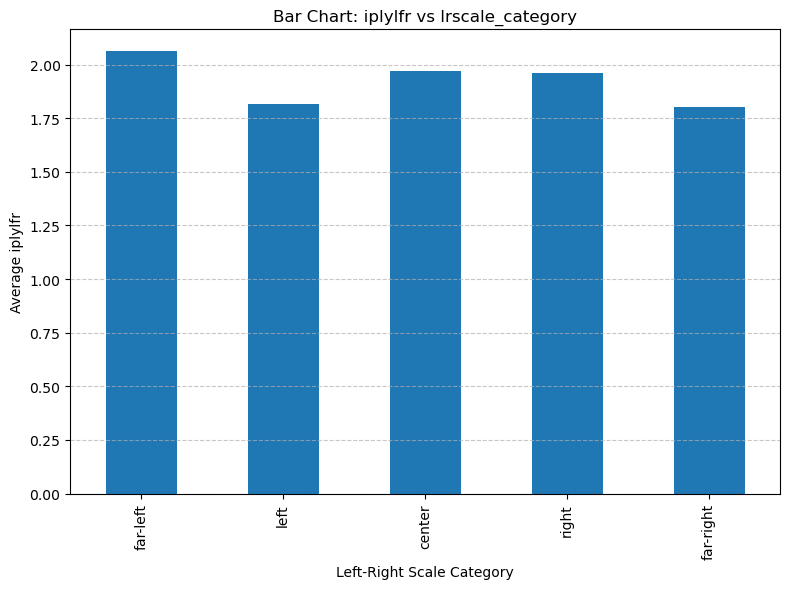

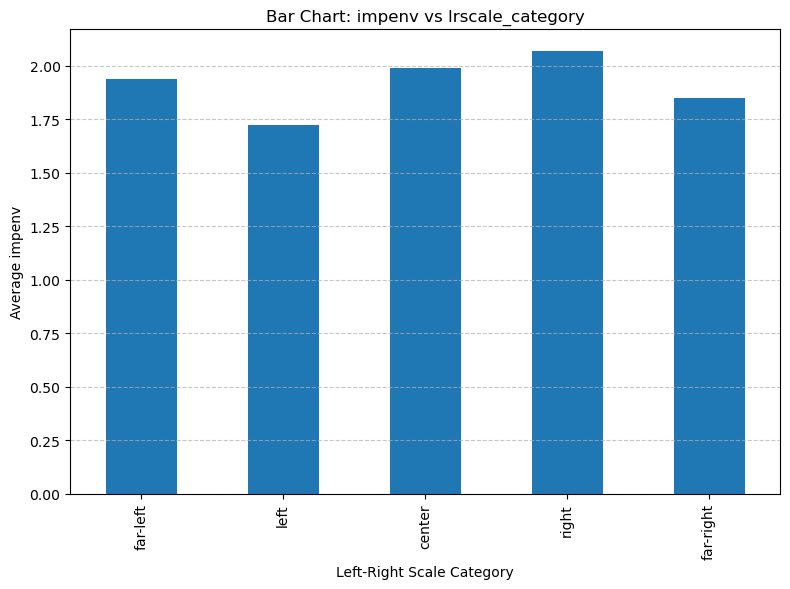

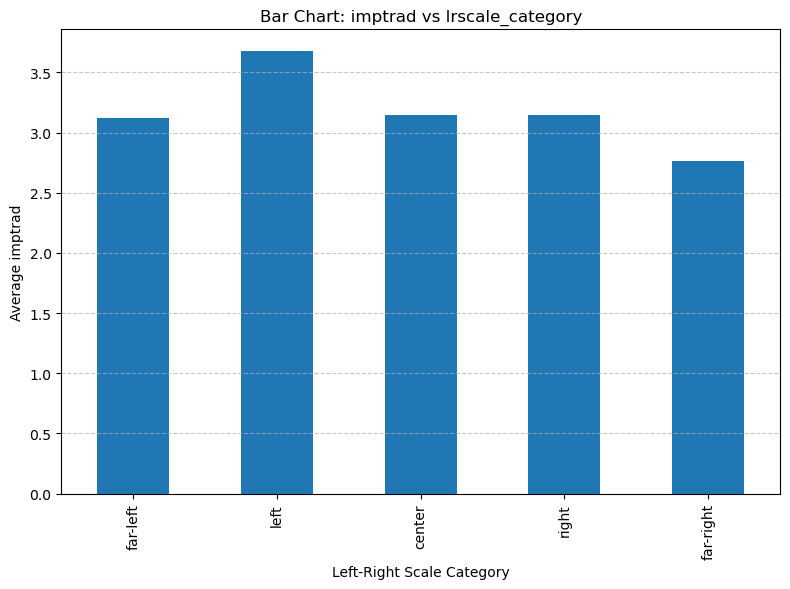

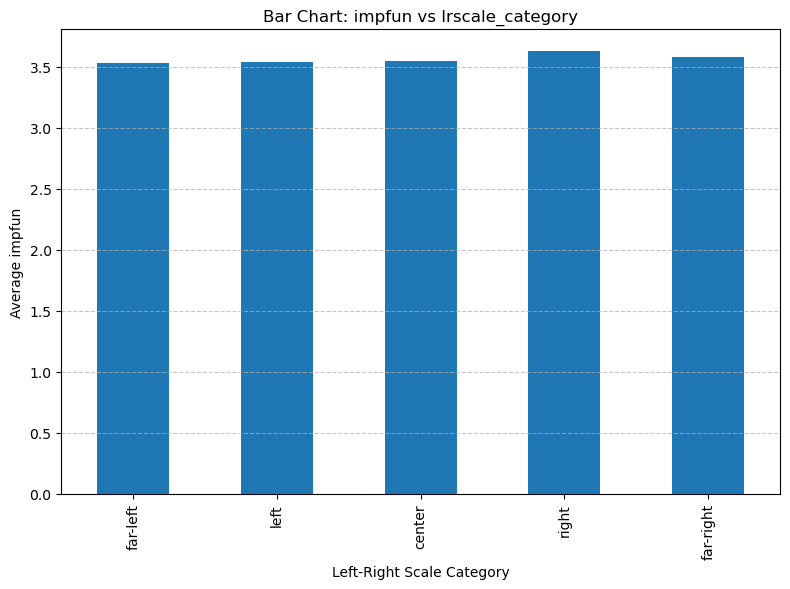

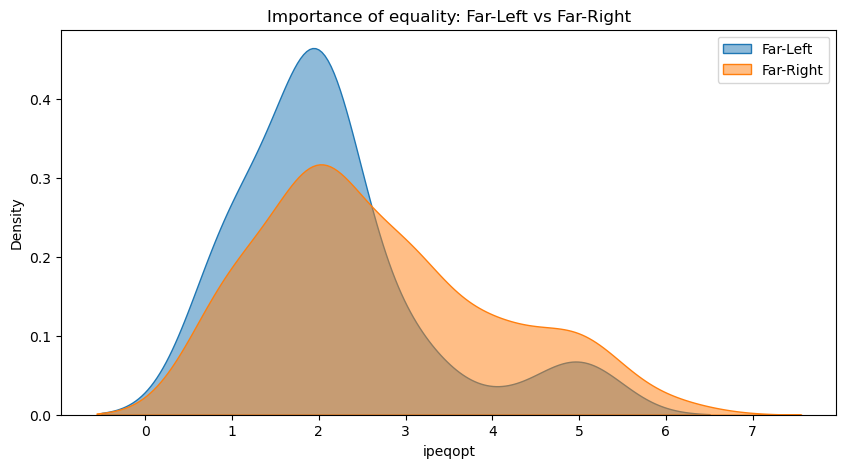

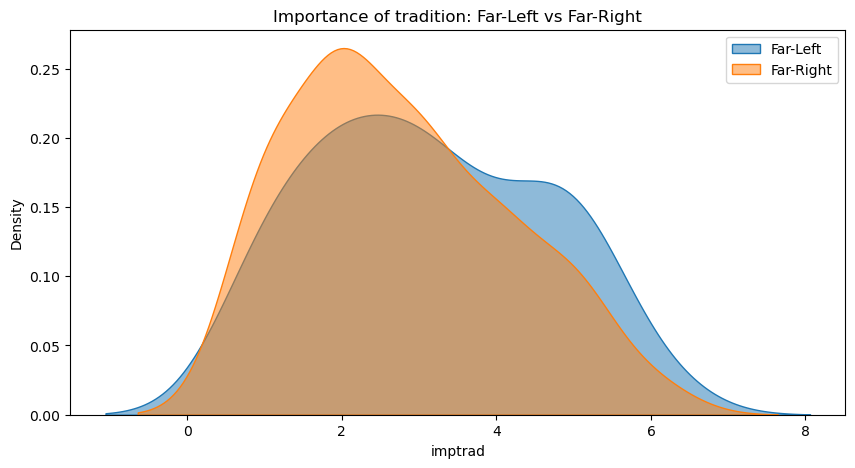

For value ipeqopt T-stat:  -2.5261542033960493 , p value:  0.012548791013804798 is below 0.05
ipeqopt t-stat:  -3.825408302506058 , p value:  0.00014680282550016575
imptrad t-stat:  3.2997419853331054 , p value:  0.0010356783425744904
impenv t-stat:  -2.297260711779985 , p value:  0.022009647112587863
ipeqopt t-stat:  -2.451824118018572 , p value:  0.014349338058955148
ipeqopt t-stat:  2.561241461866749 , p value:  0.010570685593745112
imptrad t-stat:  -2.7610141213034622 , p value:  0.005864101212779216
impenv t-stat:  2.4250242757980427 , p value:  0.015477639423670527


In [12]:
# visualizing means across political placements for all human value features incl. graphical reps
means = []
for value in values_columns:
    means.append(data.groupby('lrscale_category')[value].mean())

for i in range(len(means)):
    plt.figure(figsize=(8, 6))
    means[i].plot(kind='bar')
    plt.title("Bar Chart: " + values_columns[i] + " vs lrscale_category")
    plt.xlabel('Left-Right Scale Category')
    plt.ylabel("Average " + values_columns[i])
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


# 'ipeqopt' vs far-left and far-right right density
equality, traditions = 'ipeqopt', 'imptrad'

creativity, riches, admiration, safeliving, trying_diff_things, following_rules, understanding = 'ipcrtiv', 'imprich', 'ipshabt', 'impsafe', 'impdiff', 'ipfrule', 'ipudrst'

modesty, good_time, autonomy, helping_people, success = 'ipmodst', 'ipgdtim', 'impfree', 'iphlppl', 'ipsuces'

strong_government, adventure, proper_behaviour, respect, loyalty, environment_care, fun = 'ipstrgv', 'ipadvnt', 'ipbhprp', 'iprspot', 'iplylfr', 'impenv', 'impfun'

plt.figure(figsize=(10, 5))
sns.kdeplot(far_left[equality], label='Far-Left', fill=True, alpha=0.5)
sns.kdeplot(far_right[equality], label='Far-Right', fill=True, alpha=0.5)
plt.title(f'Importance of equality: Far-Left vs Far-Right')
plt.xlabel(equality)
plt.ylabel('Density')
plt.legend()
plt.show()

# 'imptrad' vs far-left and far-right right density
plt.figure(figsize=(10, 5))
sns.kdeplot(far_left[traditions], label='Far-Left', fill=True, alpha=0.5)
sns.kdeplot(far_right[traditions], label='Far-Right', fill=True, alpha=0.5)
plt.title(f'Importance of tradition: Far-Left vs Far-Right')
plt.xlabel(traditions)
plt.ylabel('Density')
plt.legend()
plt.show()

# finding whether there is a difference of statistical significance between of each human value variable for participants with radical political views
value_variables = [equality, traditions, creativity, riches, admiration, safeliving, trying_diff_things, following_rules, understanding, modesty, good_time, autonomy, helping_people, success, strong_government, adventure, proper_behaviour, respect, loyalty, environment_care, fun]
for var in value_variables:
    t_stat, p_value = ttest_ind(far_left[var], far_right[var], nan_policy='omit')
    if p_value < 0.05:
        print("For value", var, "T-stat: ", t_stat, ", p value: ", p_value, "is below 0.05")

#print(f"{equality} - t-statistic: {t_stat1}, p-value: {p_value1}") #ipeqopt - t-statistic: -2.5261542033960493, p-value: 0.012548791013804798
#print(f"{traditions} - t-statistic: {t_stat2}, p-value: {p_value2}") #imptrad - t-statistic: 1.456250349404576, p-value: 0.14737245415214206
# When comparing far-left and far-right participants, equality is the only significant variable that has a p-value of less than 0.05

# finding whether there is a difference of statistical significance between of each human value variable for both leanings of the political spectrum
value_variables = [equality, traditions, creativity, riches, admiration, safeliving, trying_diff_things, following_rules, understanding, modesty, good_time, autonomy, helping_people, success, strong_government, adventure, proper_behaviour, respect, loyalty, environment_care, fun]
for var in value_variables:
    t_stat, p_value = ttest_ind(leftists[var], rightists[var], nan_policy='omit')
    if p_value < 0.05:
        print(var, "t-stat: ", t_stat, ", p value: ", p_value)

# Between left and right leaning participants, three variables are of significant difference - equality, traditions and the importance of caring for the environment.
#ipeqopt t-stat:  -3.825408302506058 , p value:  0.00014680282550016575
#imptrad t-stat:  3.2997419853331054 , p value:  0.0010356783425744904
#impenv t-stat:  -2.297260711779985 , p value:  0.022009647112587863

# finding whether there is a difference of statistical significance between of each human value variable for centrist and right-leaning positions of the political spectrum
value_variables = [equality, traditions, creativity, riches, admiration, safeliving, trying_diff_things, following_rules, understanding, modesty, good_time, autonomy, helping_people, success, strong_government, adventure, proper_behaviour, respect, loyalty, environment_care, fun]
for var in value_variables:
    t_stat, p_value = ttest_ind(centrists[var], rightists[var], nan_policy='omit')
    if p_value < 0.05:
        print(var, "t-stat: ", t_stat, ", p value: ", p_value)

# In this case, the only statistically significant difference was yet again equality
#ipeqopt t-stat:  -2.451824118018572 , p value:  0.014349338058955148

# finding whether there is a difference of statistical significance between of each human value variable for centrist and left-leaning positions of the political spectrum
value_variables = [equality, traditions, creativity, riches, admiration, safeliving, trying_diff_things, following_rules, understanding, modesty, good_time, autonomy, helping_people, success, strong_government, adventure, proper_behaviour, respect, loyalty, environment_care, fun]
for var in value_variables:
    t_stat, p_value = ttest_ind(centrists[var], leftists[var], nan_policy='omit')
    if p_value < 0.05:
        print(var, "t-stat: ", t_stat, ", p value: ", p_value)

# Surprisingly, the statistically significant differences are yet again only for three variables - equality, traditions and the importance of caring for the environment.
#ipeqopt t-stat:  2.561241461866749 , p value:  0.010570685593745112
#imptrad t-stat:  -2.7610141213034622 , p value:  0.005864101212779216
#impenv t-stat:  2.4250242757980427 , p value:  0.015477639423670527


Age, gender and values

/var/folders/9_/cq1cfm697t5966116cm1w44c0000gn/T/ipykernel_6397/871948883.py:13: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = melted_data.pivot_table(


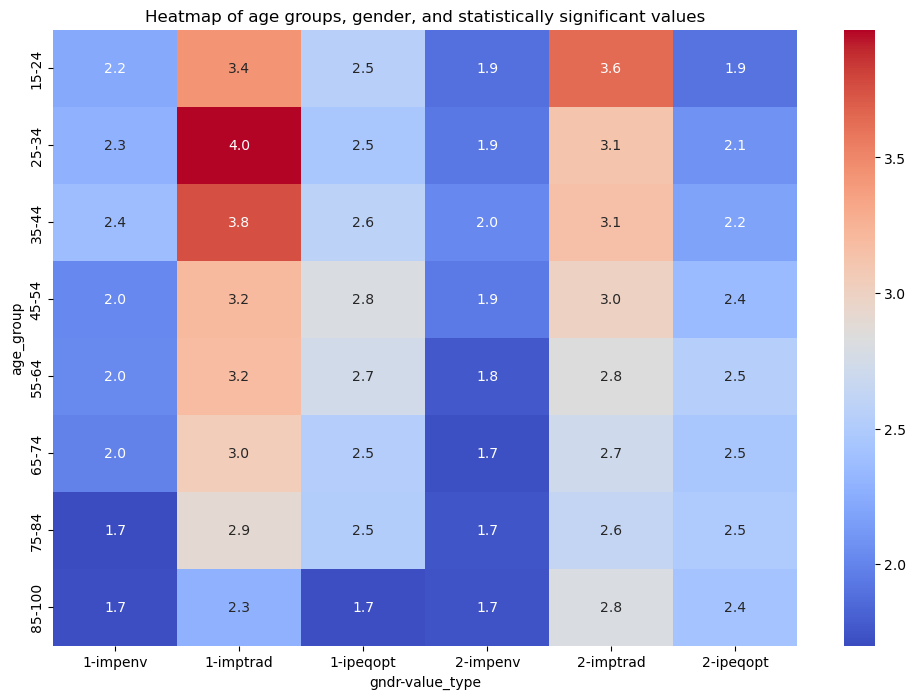

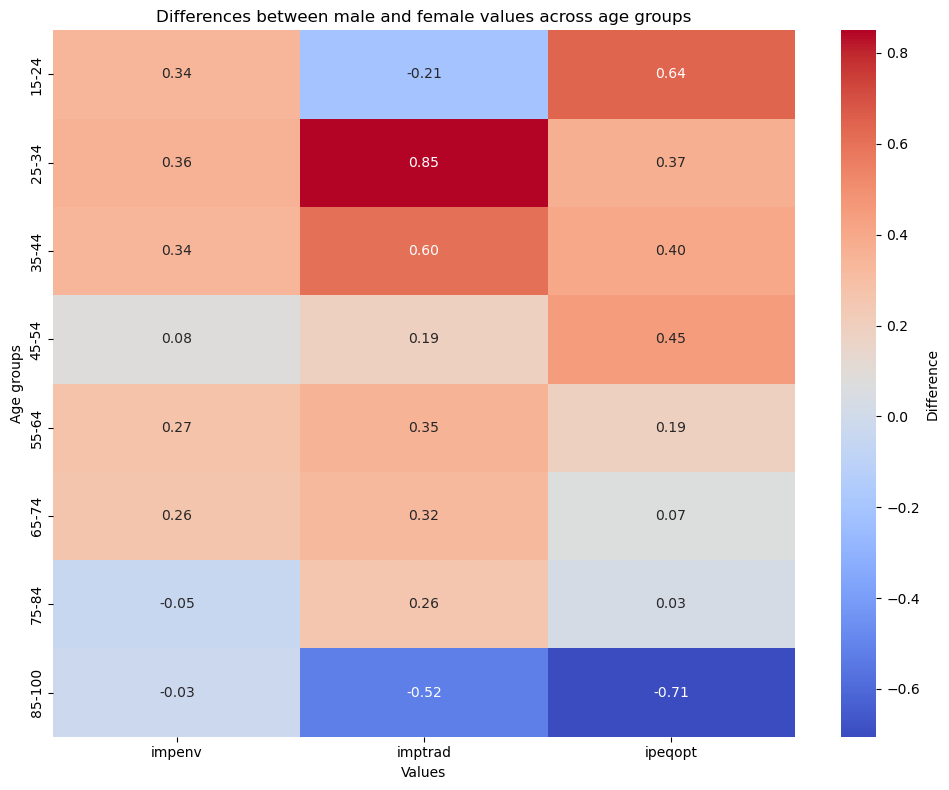

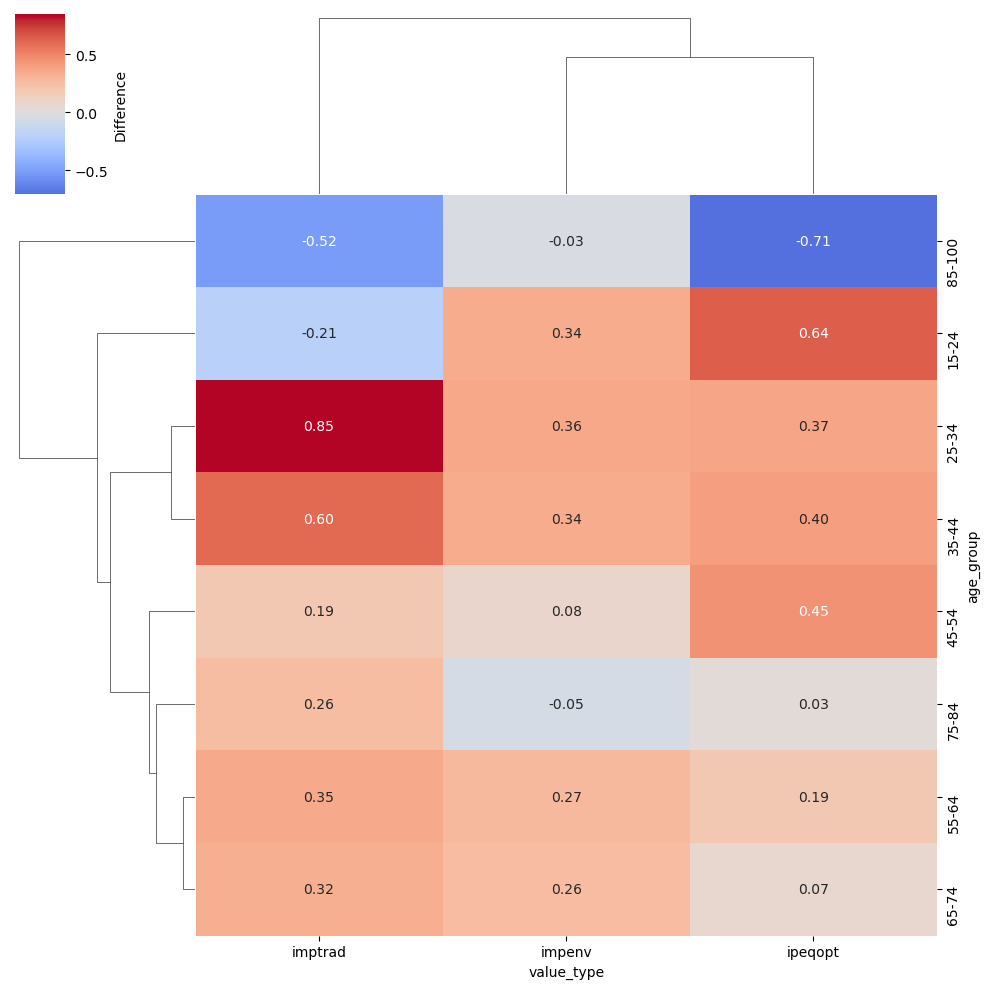

In [14]:
data = data[data['agea'] != 999]

bins = [15, 25, 35, 45, 55, 65, 75, 85, 100]
labels = ['15-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84', '85-100']

data['age_group'] = pd.cut(data['agea'], bins=bins, labels=labels, right=False)

melted_data = data.melt(id_vars=['age_group', 'gndr'],
                    value_vars=['ipeqopt', 'imptrad', 'impenv'],
                    var_name='value_type',
                    value_name='value')

pivot_table = melted_data.pivot_table(
    index=['age_group'],
    columns=['gndr', 'value_type'],
    values='value',
    aggfunc='mean'
)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="coolwarm")
plt.title("Heatmap of age groups, gender, and statistically significant values")
plt.show()

#comparing differences
gender_diff = pivot_table.xs(1, level='gndr', axis=1) - pivot_table.xs(2, level='gndr', axis=1)

heatmap_data = gender_diff.reset_index()
heatmap_data.set_index('age_group', inplace=True)

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': "Difference"})
plt.title("Differences between male and female values across age groups")
plt.xlabel("Values")
plt.ylabel("Age groups")
plt.tight_layout()
#plt.savefig('poster4.pdf', format='pdf')
plt.show()

#biggest difference appears in the age group 25-34, where the male average is 0.85 higher

# clustered heatmap (using hierarchical clustering)
# ward
sns.clustermap(gender_diff,
               cmap="coolwarm", center=0, annot=True, fmt=".2f",
               method='ward',
               metric='euclidean',
               row_cluster=True, col_cluster=True,
               xticklabels=True, yticklabels=True,
               cbar_kws={'label': "Difference"})